In [ ]:
# Import our dependencies
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt



In [ ]:
# Import our input dataset
data_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Resources/all_tele_main.csv')
data_df = data_df.sort_values(by=['datetime']).drop_duplicates(subset=['datetime', 'machineid'], keep='first').reset_index(drop=True)
data_df.head()

<ipython-input-2-43cc9e3de11c>:2: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Resources/all_tele_main.csv')


,datetime,machineid,machinemodel,machineage,volt,rotate,pressure,vibration,errorid,compmaint,compfail
0,2015-01-01 06:00:00,34,model4,10,181.859394,483.215401,82.463735,37.849856,0,comp2,0
1,2015-01-01 06:00:00,41,model4,9,162.314459,424.540949,129.113722,52.591978,0,0,0
2,2015-01-01 06:00:00,39,model4,0,150.138449,421.747438,100.174935,40.367037,0,0,0
3,2015-01-01 06:00:00,10,model3,10,158.421261,500.830885,119.750673,45.571344,0,0,0
4,2015-01-01 06:00:00,45,model3,14,191.649670,383.200891,85.630577,52.169106,0,0,0


In [ ]:
data_df.dtypes

datetime         object
machineid         int64
machinemodel     object
machineage        int64
volt            float64
rotate          float64
pressure        float64
vibration       float64
errorid          object
compmaint        object
compfail          int64
dtype: object

In [ ]:
data_df.count()

datetime        876100
machineid       876100
machinemodel    876100
machineage      876100
volt            876100
rotate          876100
pressure        876100
vibration       876100
errorid         876100
compmaint       876100
compfail        876100
dtype: int64

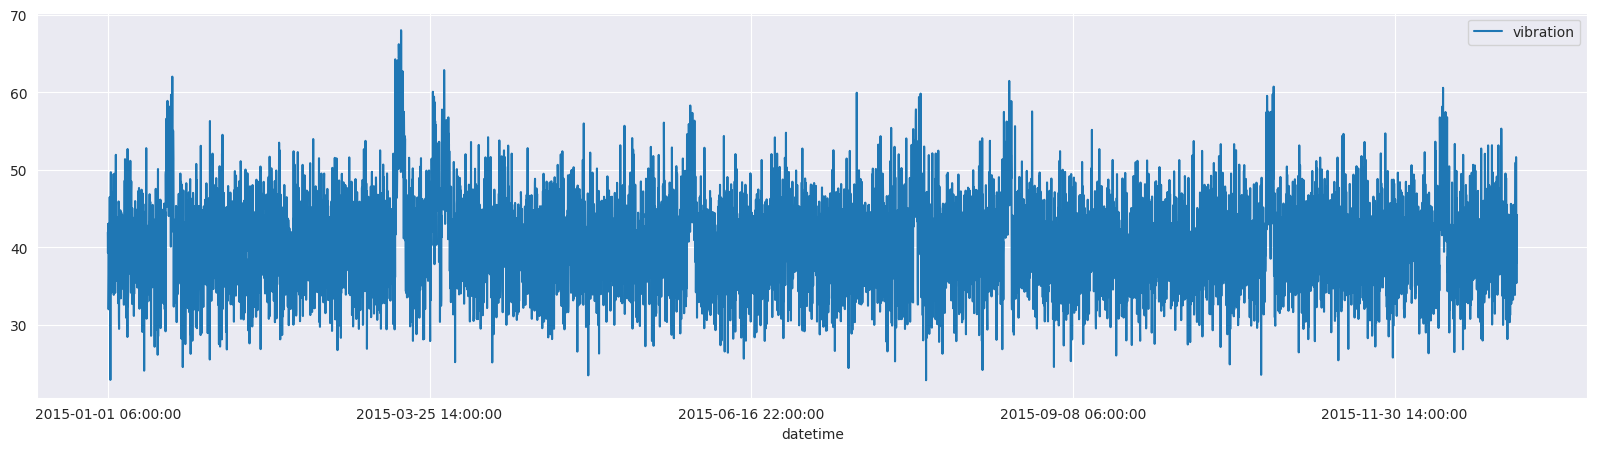

In [ ]:
#Vibration plot for one machine
vib_machine_99 = data_df.loc[(data_df['machineid'] == 99), ('datetime', 'vibration')].set_index('datetime')
vib_plot = vib_machine_99.plot(kind='line', figsize=(20,5))
plt.show()

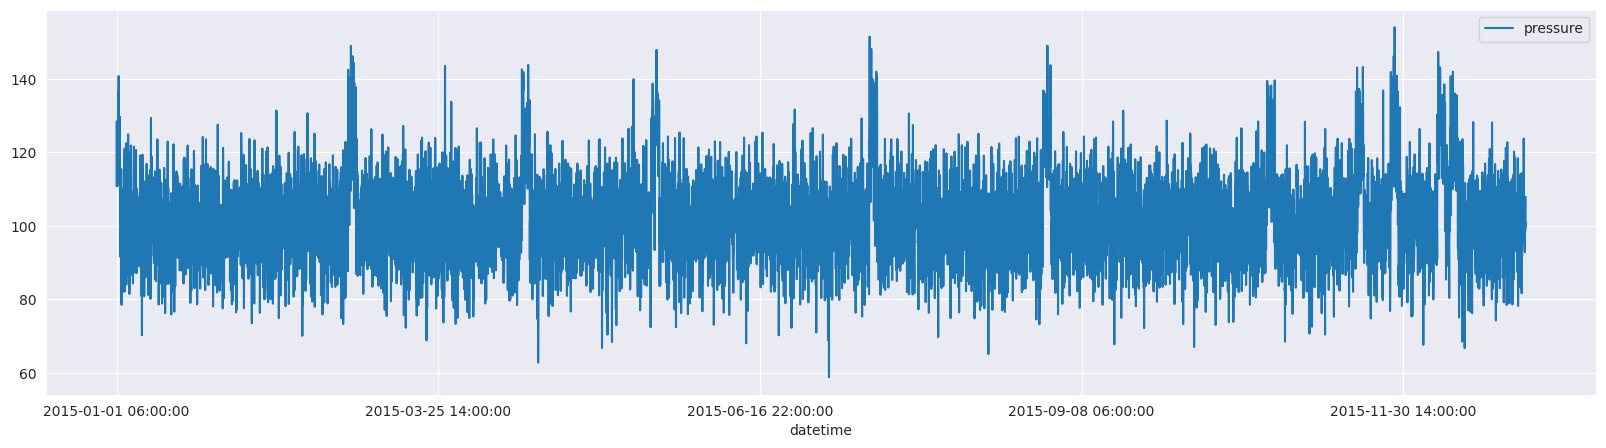

In [ ]:
# Pressure plot for one machine
pressure_machine_99 = data_df.loc[(data_df['machineid'] == 99), ('datetime', 'pressure')].set_index('datetime')
pressure_plot = pressure_machine_99.plot(kind='line', figsize=(20,5))
plt.show()

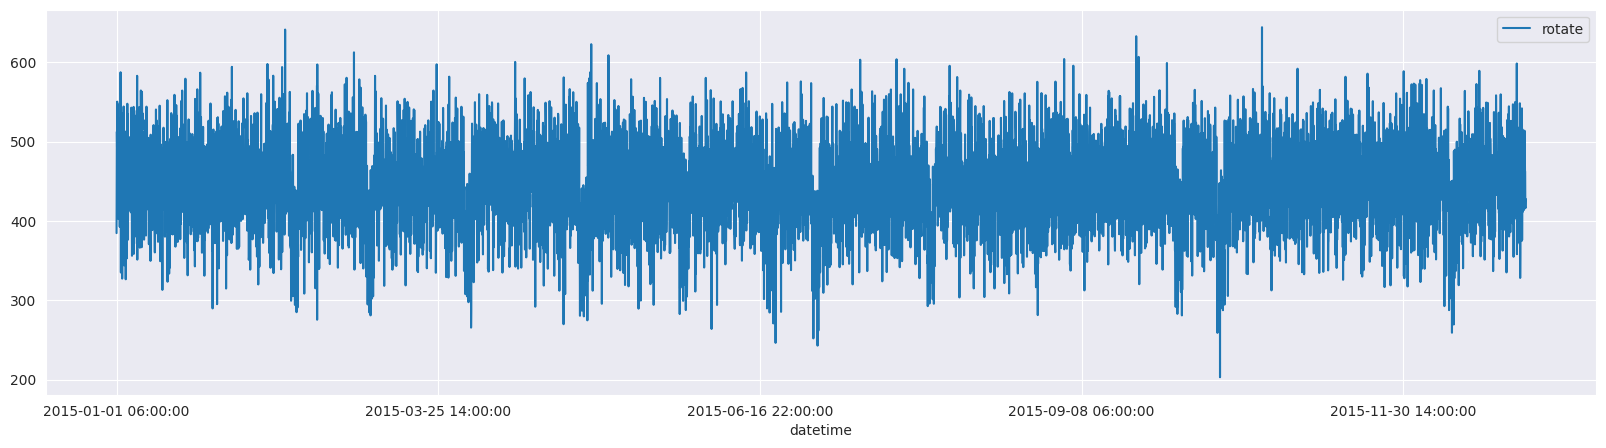

In [ ]:
# Rotation plot for one machine
rotate_machine_99 = data_df.loc[(data_df['machineid'] == 99), ('datetime', 'rotate')].set_index('datetime')
rotate_plot = rotate_machine_99.plot(kind='line', figsize=(20,5))
plt.show()

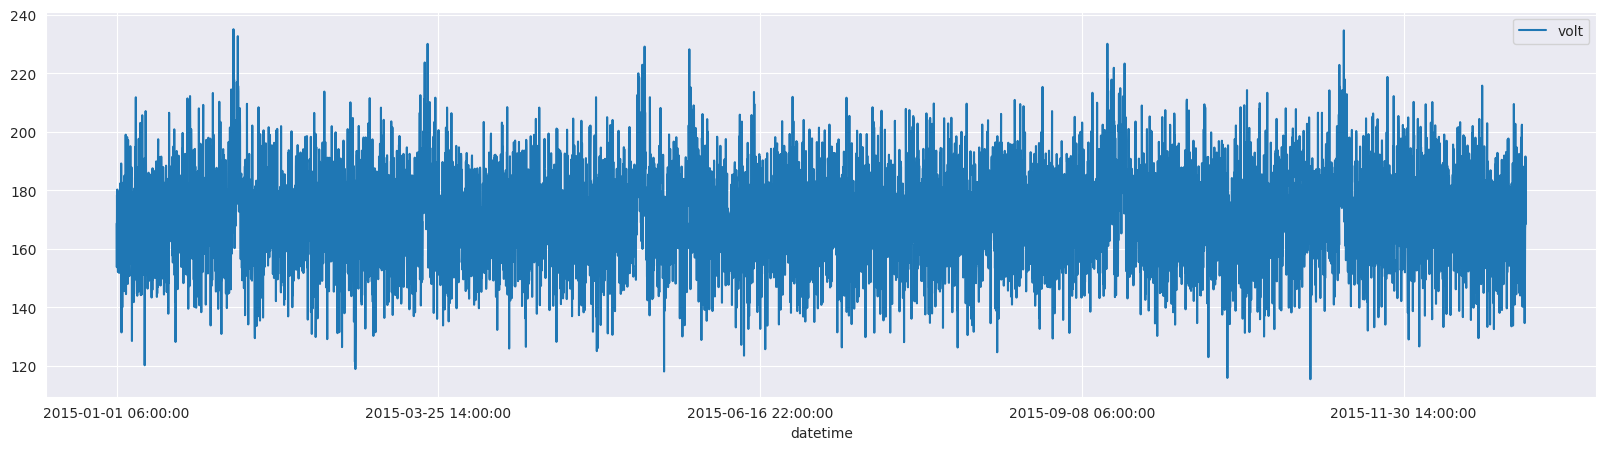

In [ ]:
# Volt plot for one machine
volt_machine_99 = data_df.loc[(data_df['machineid'] == 99), ('datetime', 'volt')].set_index('datetime')
volt_plot = volt_machine_99.plot(kind='line', figsize=(20,5))
plt.show()

In [ ]:
# Update date format
data_df['datetime'] = pd.to_datetime(data_df['datetime'])
data_df.head()
data_df.dtypes

datetime        datetime64[ns]
machineid                int64
machinemodel            object
machineage               int64
volt                   float64
rotate                 float64
pressure               float64
vibration              float64
errorid                 object
compmaint               object
compfail                 int64
dtype: object

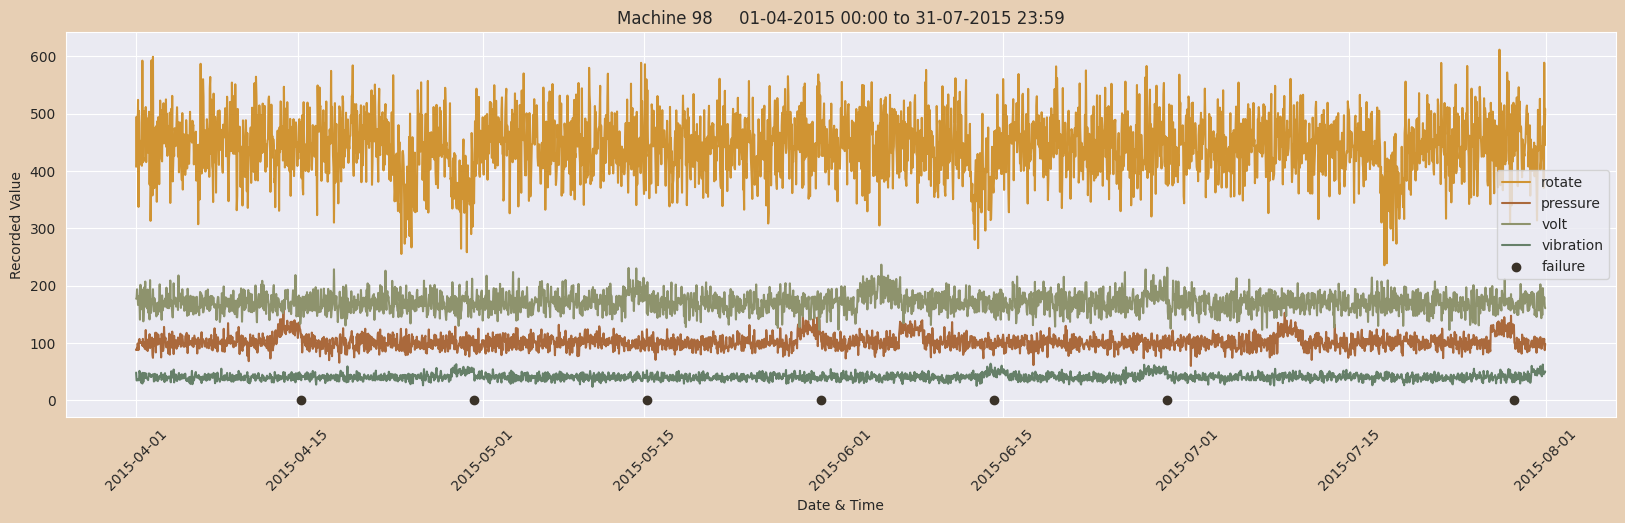

In [ ]:
# Plot all readings for one machine over a shorter period of time

#machine 98 for 01/04 - 31/07
query3 = (data_df['machineid'] == 98) & (data_df['datetime'] >= '2015-04-01 00:00:00') & (data_df['datetime'] <= '2015-07-31 23:59:00')
query4 = (data_df['machineid'] == 98) & (data_df['compfail'] == 1) & (data_df['datetime'] >= '2015-04-01 00:00:00') & (data_df['datetime'] <= '2015-07-31 23:59:00')

# loc each feature
rotate_machine_98 = data_df.loc[query3, ('datetime', 'rotate')].set_index('datetime')
pressure_machine_98 = data_df.loc[query3, ('datetime', 'pressure')].set_index('datetime')
volt_machine_98 = data_df.loc[query3, ('datetime', 'volt')].set_index('datetime')
vibration_machine_98 = data_df.loc[query3, ('datetime', 'vibration')].set_index('datetime')

# x & y variables for failure scatter
x_failures = data_df.loc[query4, ('datetime')]
y_failures = data_df.loc[query4, ('compfail')]

#set figure size & colour
plt.figure(figsize=(20,5), facecolor='#e7cfb4')

#plot each feature
plt.plot(rotate_machine_98, label='rotate', color='#d09433')
plt.plot(pressure_machine_98, label='pressure', color='#aa693c')
plt.plot(volt_machine_98, label='volt', color='#8e936d')
plt.plot(vibration_machine_98, label='vibration', color='#668069')
plt.scatter(x_failures, y_failures,label='failure', color='#3a3228')

#set design features
plt.xticks(rotation=45)
plt.title('Machine 98     01-04-2015 00:00 to 31-07-2015 23:59')
plt.xlabel('Date & Time')
plt.ylabel('Recorded Value')

plt.legend()
plt.show()

<Axes: title={'center': 'Number of Failures Per Machine'}, xlabel='Machine ID', ylabel='Failures'>

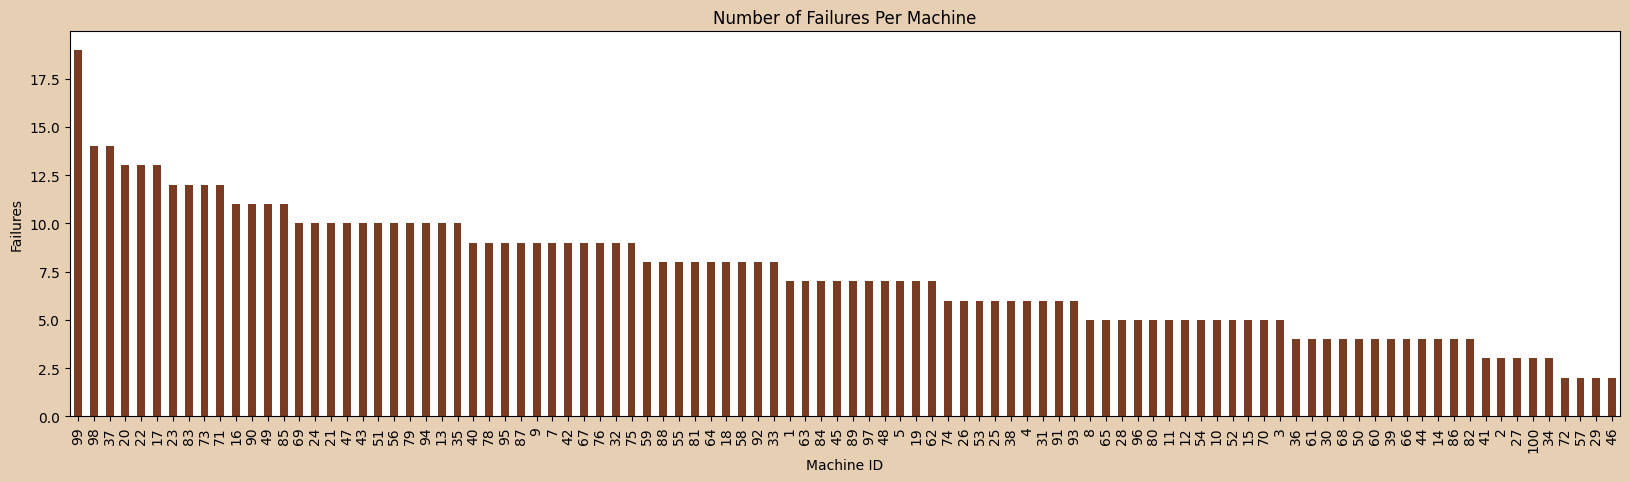

In [ ]:
#Plot all faults per machine over the full period

#loc failures
machine_failures = data_df[(data_df['compfail'] == 1)]
#set plot size and colour
plt.figure(figsize=(20,5), facecolor='#e7cfb4')
#plot
machine_failures['machineid'].value_counts().plot(kind='bar', color='#793b22', title='Number of Failures Per Machine', xlabel='Machine ID', ylabel='Failures')

<Axes: >

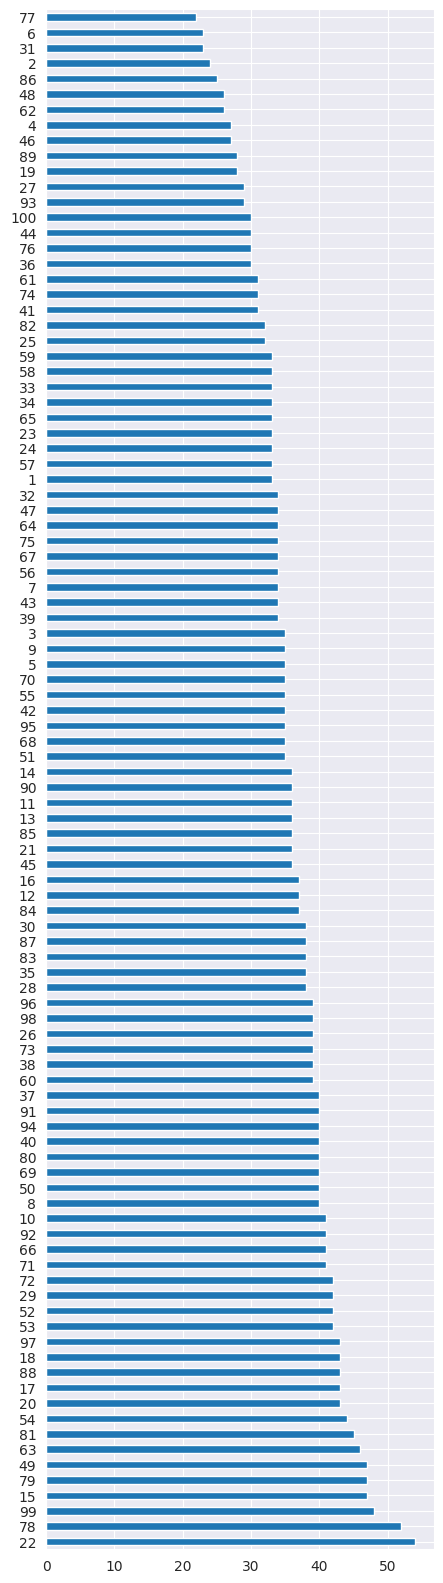

In [ ]:
# plot all error counts for each machine over the full period
machine_errors = data_df[(data_df['errorid'].str.contains('error', na=False))]
# plot size
plt.figure(figsize=(5,20))
#plot
machine_errors['machineid'].value_counts().plot(kind='barh')

<Axes: title={'center': 'Error Types'}, xlabel='Number of Errors', ylabel='Error Type'>

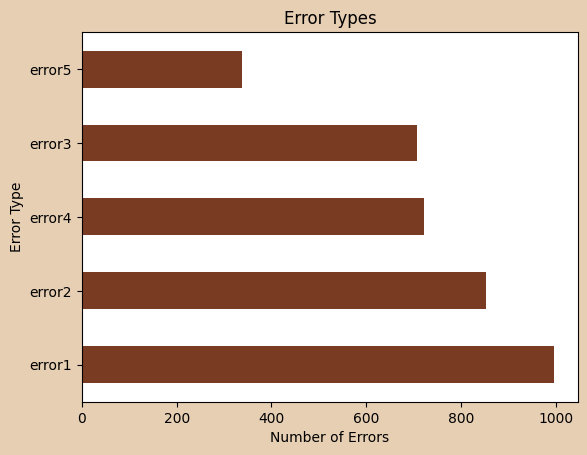

In [ ]:
#plot occurences of each error
machine_all = data_df[(data_df['errorid'].str.contains('error', na=False))]
# set plot colour
plt.figure(facecolor='#e7cfb4')
# plot
machine_all['errorid'].value_counts().plot(kind='barh', color='#793b22', title='Error Types', xlabel='Number of Errors', ylabel='Error Type')

<Axes: title={'center': 'Maintenance Carried Out'}, xlabel='Number of Instances', ylabel='Component Type'>

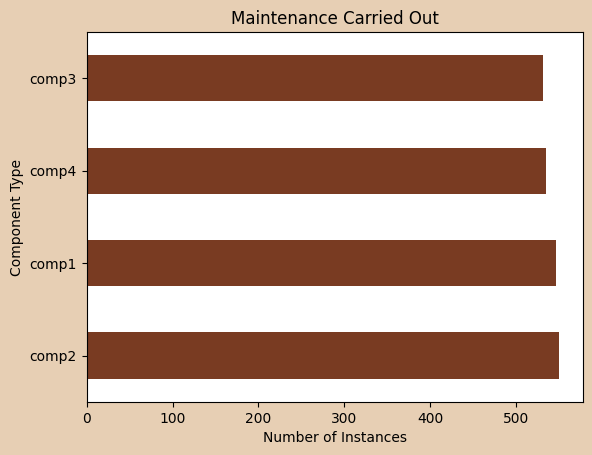

In [ ]:
# plot all instances of maintenance, and the component it was carried out on
machine_main = data_df[(data_df['compmaint'].str.contains('comp', na=False))]
# set plot colour
plt.figure(facecolor='#e7cfb4')
# plot
machine_main['compmaint'].value_counts().plot(kind='barh', color='#793b22', title='Maintenance Carried Out', xlabel='Number of Instances', ylabel='Component Type')

<ipython-input-29-29d755e42bde>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data2_df.corr(), cmap='YlOrBr')


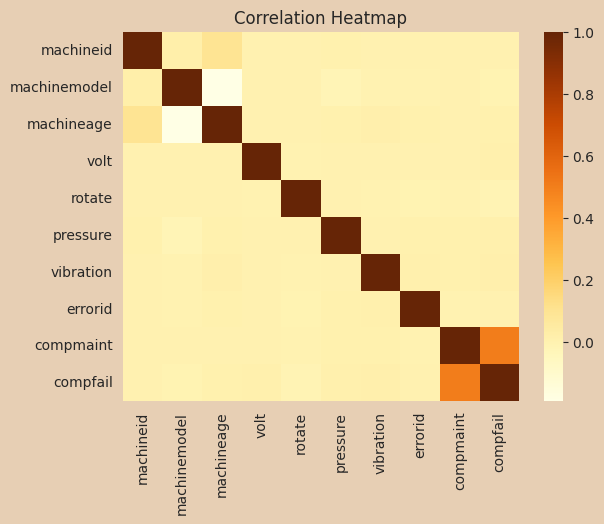

In [ ]:
# plot correlation heatmap for dataset
data2_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Resources/PdM_telemetry_maintenance23.csv')
data2_df = data2_df.sort_values(by=['datetime']).drop_duplicates(subset=['datetime', 'machineid'], keep='first').reset_index(drop=True)

#set plot colour
plt.figure(facecolor='#e7cfb4')
# plot heatmap
sns.heatmap(data2_df.corr(), cmap='YlOrBr')
plt.title('Correlation Heatmap')
plt.show()

<Axes: >

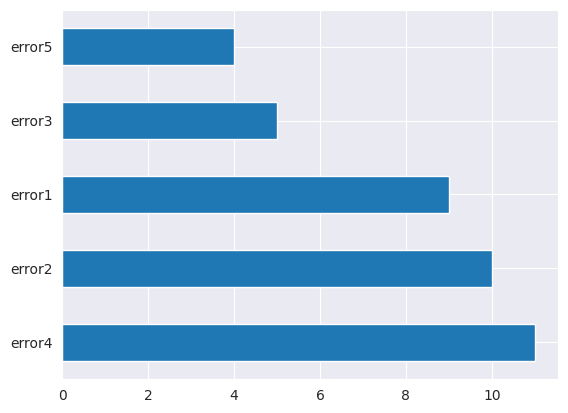

In [ ]:
# plot errors on one machine only
machine_98_only = data_df[(data_df['machineid'] == 98) & (data_df['errorid'].str.contains('error', na=False))]
machine_98_only['errorid'].value_counts().plot(kind='barh')

In [ ]:
# Import our machine dataset
machines = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Resources/PdM_machines.csv')
machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


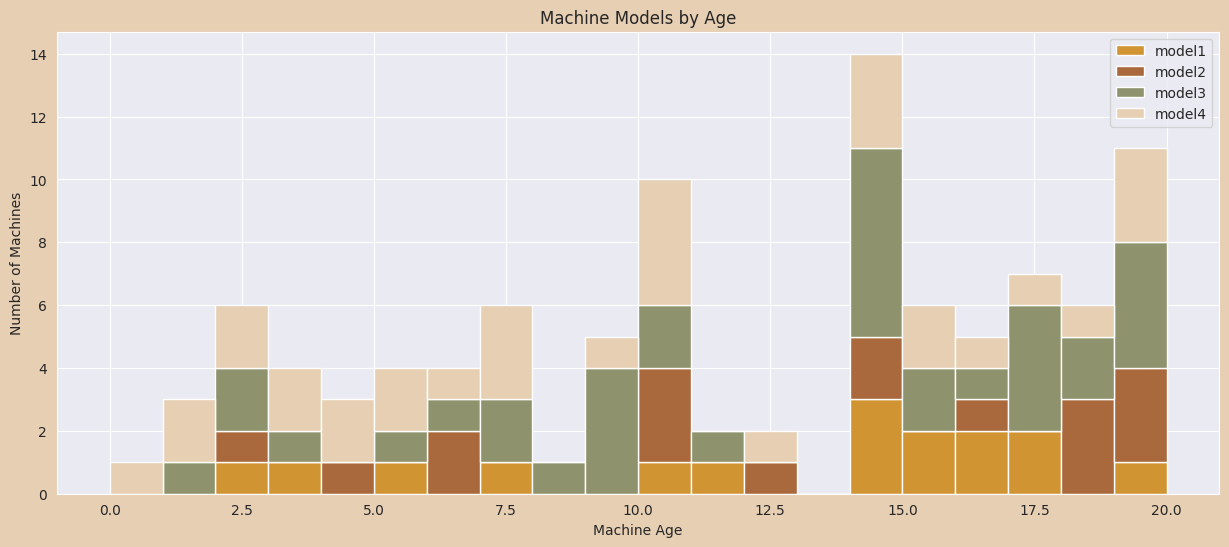

In [ ]:
# plot machine models by age

#set style
sns.set_style("darkgrid")
#plot size & colour
plt.figure(figsize=(15, 6), facecolor='#e7cfb4')
# plot
_, bins, _ = plt.hist([machines.loc[machines['model'] == 'model1', 'age'],
                       machines.loc[machines['model'] == 'model2', 'age'],
                       machines.loc[machines['model'] == 'model3', 'age'],
                       machines.loc[machines['model'] == 'model4', 'age']],
                       20, stacked=True, label=['model1', 'model2', 'model3', 'model4'], color=['#d09433', '#aa693c', '#8e936d', '#e7cfb4'])
plt.title('Machine Models by Age')
plt.xlabel('Machine Age')
plt.ylabel('Number of Machines')
plt.legend()